# 1. Import Libraries

In [303]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import linregress
from sklearn.metrics import matthews_corrcoef
import statsmodels.api as sm
from stargazer.stargazer import Stargazer, LineLocation
from dateutil.parser import parse
import dataframe_image as dfi

pd.set_option('display.max_columns', None)  # option to allow the display of all columns in a dataframe without truncation

# 2. Establish Token Prices DataFrame

In [304]:
df_token_prices = pd.read_csv("Datasets for Merging/token_prices_dataset.csv", 
                              delimiter = ",",
                              usecols = ["Club_Name","Token_Name","Date","Close"])
df_token_prices

,Club_Name,Token_Name,Date,Close
0,AC Milan,ACM8538-USD,2021-02-23,5.944448
1,AC Milan,ACM8538-USD,2021-02-24,18.385660
2,AC Milan,ACM8538-USD,2021-02-25,14.827024
3,AC Milan,ACM8538-USD,2021-02-26,12.321579
4,AC Milan,ACM8538-USD,2021-02-27,12.433650
...,...,...,...,...
45707,Young Boys,YBO-USD,2023-05-03,0.499208
45708,Young Boys,YBO-USD,2023-05-04,0.494228
45709,Young Boys,YBO-USD,2023-05-05,0.483334
45710,Young Boys,YBO-USD,2023-05-06,NaN


In [305]:
df_token_prices.dtypes

Club_Name      object
Token_Name     object
Date           object
Close         float64
dtype: object

In [306]:
# convert the Date column to datetime dtype
df_token_prices["Date"] = pd.to_datetime(df_token_prices["Date"], 
                                        format = "%Y-%m-%d", 
                                        yearfirst = True)

In [307]:
df_token_prices.dtypes

Club_Name             object
Token_Name            object
Date          datetime64[ns]
Close                float64
dtype: object

# 3. Establish Match Data DataFrame

In [308]:
df_match_data = pd.read_csv("Datasets for Merging/match_data_dataset.csv", 
                            delimiter = ",")
df_match_data

,Tournament,Domestic0_International1,Season,Date,Home,Score_Home,Score_Away,Away,Home_Wins,Away_Wins,Draw
0,Belgian First Division A,0,18/19,2018-07-27,Standard LiÃ¨ge,3,2,Gent,1,0,0
1,Belgian First Division A,0,18/19,2018-07-28,Kortrijk,1,4,Anderlecht,0,1,0
2,Belgian First Division A,0,18/19,2018-07-28,Sint-Truiden,0,0,Cercle Brugge,0,0,1
3,Belgian First Division A,0,18/19,2018-07-28,Zulte Waregem,2,2,Waasland-Bev,0,0,1
4,Belgian First Division A,0,18/19,2018-07-28,Oostende,2,1,Excel Mouscron,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
20280,Swiss Super League,0,22/23,2023-04-29,Lugano,5,1,Grasshopper,1,0,0
20281,Swiss Super League,0,22/23,2023-04-29,Servette FC,1,1,St. Gallen,0,0,1
20282,Swiss Super League,0,22/23,2023-04-30,ZÃ¼rich,2,2,Sion,0,0,1
20283,Swiss Super League,0,22/23,2023-04-30,Young Boys,5,1,Luzern,1,0,0


In [309]:
# convert the Date column to datetime dtype
df_match_data["Date"] = df_match_data["Date"].astype('datetime64[ns]')

In [310]:
df_match_data.dtypes

Tournament                          object
Domestic0_International1             int64
Season                              object
Date                        datetime64[ns]
Home                                object
Score_Home                           int64
Score_Away                           int64
Away                                object
Home_Wins                            int64
Away_Wins                            int64
Draw                                 int64
dtype: object

In [311]:
df_match_data.rename(columns = {"Domestic0_International1" : "International"}, inplace = True)

# 4. Data Wrangling: Match Data

## 4.1. Adjust df_match_data_home DataFrame

In [312]:
# firstly, split the df_match_data DataFrame into home and away DataFrames
df_match_data_home = df_match_data[["Tournament", "International", "Date", "Home", "Home_Wins", "Draw"]]
df_match_data_home

,Tournament,International,Date,Home,Home_Wins,Draw
0,Belgian First Division A,0,2018-07-27,Standard LiÃ¨ge,1,0
1,Belgian First Division A,0,2018-07-28,Kortrijk,0,0
2,Belgian First Division A,0,2018-07-28,Sint-Truiden,0,1
3,Belgian First Division A,0,2018-07-28,Zulte Waregem,0,1
4,Belgian First Division A,0,2018-07-28,Oostende,1,0
...,...,...,...,...,...,...
20280,Swiss Super League,0,2023-04-29,Lugano,1,0
20281,Swiss Super League,0,2023-04-29,Servette FC,0,1
20282,Swiss Super League,0,2023-04-30,ZÃ¼rich,0,1
20283,Swiss Super League,0,2023-04-30,Young Boys,1,0


In [313]:
# rename the column Home to Club and Home_Wins to Win
df_match_data_home = df_match_data_home.rename(columns = {"Home" : "Club"}, errors = "ignore")
df_match_data_home = df_match_data_home.rename(columns = {"Home_Wins" : "Win"}, errors = "ignore")
df_match_data_home

,Tournament,International,Date,Club,Win,Draw
0,Belgian First Division A,0,2018-07-27,Standard LiÃ¨ge,1,0
1,Belgian First Division A,0,2018-07-28,Kortrijk,0,0
2,Belgian First Division A,0,2018-07-28,Sint-Truiden,0,1
3,Belgian First Division A,0,2018-07-28,Zulte Waregem,0,1
4,Belgian First Division A,0,2018-07-28,Oostende,1,0
...,...,...,...,...,...,...
20280,Swiss Super League,0,2023-04-29,Lugano,1,0
20281,Swiss Super League,0,2023-04-29,Servette FC,0,1
20282,Swiss Super League,0,2023-04-30,ZÃ¼rich,0,1
20283,Swiss Super League,0,2023-04-30,Young Boys,1,0


In [314]:
# add the column Home which contains the binary variable Home where 1 is True and 0 is False (for this DataFrame, entire column Home set to 1)
df_match_data_home["Home"] = 1 
df_match_data_home

,Tournament,International,Date,Club,Win,Draw,Home
0,Belgian First Division A,0,2018-07-27,Standard LiÃ¨ge,1,0,1
1,Belgian First Division A,0,2018-07-28,Kortrijk,0,0,1
2,Belgian First Division A,0,2018-07-28,Sint-Truiden,0,1,1
3,Belgian First Division A,0,2018-07-28,Zulte Waregem,0,1,1
4,Belgian First Division A,0,2018-07-28,Oostende,1,0,1
...,...,...,...,...,...,...,...
20280,Swiss Super League,0,2023-04-29,Lugano,1,0,1
20281,Swiss Super League,0,2023-04-29,Servette FC,0,1,1
20282,Swiss Super League,0,2023-04-30,ZÃ¼rich,0,1,1
20283,Swiss Super League,0,2023-04-30,Young Boys,1,0,1


In [315]:
# reorder the columns: 
df_match_data_home = df_match_data_home[["Date", "Tournament", "International", "Club", "Home", "Win", "Draw"]]
df_match_data_home

,Date,Tournament,International,Club,Home,Win,Draw
0,2018-07-27,Belgian First Division A,0,Standard LiÃ¨ge,1,1,0
1,2018-07-28,Belgian First Division A,0,Kortrijk,1,0,0
2,2018-07-28,Belgian First Division A,0,Sint-Truiden,1,0,1
3,2018-07-28,Belgian First Division A,0,Zulte Waregem,1,0,1
4,2018-07-28,Belgian First Division A,0,Oostende,1,1,0
...,...,...,...,...,...,...,...
20280,2023-04-29,Swiss Super League,0,Lugano,1,1,0
20281,2023-04-29,Swiss Super League,0,Servette FC,1,0,1
20282,2023-04-30,Swiss Super League,0,ZÃ¼rich,1,0,1
20283,2023-04-30,Swiss Super League,0,Young Boys,1,1,0


## 4.2. Adjust df_match_data_away DataFrame

In [316]:
# firstly, split the df_match_data DataFrame into home and away DataFrames
df_match_data_away = df_match_data[["Tournament", "International", "Date", "Away", "Away_Wins", "Draw"]]
df_match_data_away

,Tournament,International,Date,Away,Away_Wins,Draw
0,Belgian First Division A,0,2018-07-27,Gent,0,0
1,Belgian First Division A,0,2018-07-28,Anderlecht,1,0
2,Belgian First Division A,0,2018-07-28,Cercle Brugge,0,1
3,Belgian First Division A,0,2018-07-28,Waasland-Bev,0,1
4,Belgian First Division A,0,2018-07-28,Excel Mouscron,0,0
...,...,...,...,...,...,...
20280,Swiss Super League,0,2023-04-29,Grasshopper,0,0
20281,Swiss Super League,0,2023-04-29,St. Gallen,0,1
20282,Swiss Super League,0,2023-04-30,Sion,0,1
20283,Swiss Super League,0,2023-04-30,Luzern,0,0


In [317]:
# rename the column Home to Club and Home_Wins to Win
df_match_data_away = df_match_data_away.rename(columns = {"Away" : "Club"}, errors = "ignore")
df_match_data_away = df_match_data_away.rename(columns = {"Away_Wins" : "Win"}, errors = "ignore")
df_match_data_away

,Tournament,International,Date,Club,Win,Draw
0,Belgian First Division A,0,2018-07-27,Gent,0,0
1,Belgian First Division A,0,2018-07-28,Anderlecht,1,0
2,Belgian First Division A,0,2018-07-28,Cercle Brugge,0,1
3,Belgian First Division A,0,2018-07-28,Waasland-Bev,0,1
4,Belgian First Division A,0,2018-07-28,Excel Mouscron,0,0
...,...,...,...,...,...,...
20280,Swiss Super League,0,2023-04-29,Grasshopper,0,0
20281,Swiss Super League,0,2023-04-29,St. Gallen,0,1
20282,Swiss Super League,0,2023-04-30,Sion,0,1
20283,Swiss Super League,0,2023-04-30,Luzern,0,0


In [318]:
# add the column Home which contains the binary variable Home where 1 is True and 0 is False (for this DataFrame, entire column Home set to 0)
df_match_data_away["Home"] = 0
df_match_data_away

,Tournament,International,Date,Club,Win,Draw,Home
0,Belgian First Division A,0,2018-07-27,Gent,0,0,0
1,Belgian First Division A,0,2018-07-28,Anderlecht,1,0,0
2,Belgian First Division A,0,2018-07-28,Cercle Brugge,0,1,0
3,Belgian First Division A,0,2018-07-28,Waasland-Bev,0,1,0
4,Belgian First Division A,0,2018-07-28,Excel Mouscron,0,0,0
...,...,...,...,...,...,...,...
20280,Swiss Super League,0,2023-04-29,Grasshopper,0,0,0
20281,Swiss Super League,0,2023-04-29,St. Gallen,0,1,0
20282,Swiss Super League,0,2023-04-30,Sion,0,1,0
20283,Swiss Super League,0,2023-04-30,Luzern,0,0,0


In [319]:
# reorder the columns: 
df_match_data_away = df_match_data_away[["Date", "Tournament", "International", "Club", "Home", "Win", "Draw"]]
df_match_data_away

,Date,Tournament,International,Club,Home,Win,Draw
0,2018-07-27,Belgian First Division A,0,Gent,0,0,0
1,2018-07-28,Belgian First Division A,0,Anderlecht,0,1,0
2,2018-07-28,Belgian First Division A,0,Cercle Brugge,0,0,1
3,2018-07-28,Belgian First Division A,0,Waasland-Bev,0,0,1
4,2018-07-28,Belgian First Division A,0,Excel Mouscron,0,0,0
...,...,...,...,...,...,...,...
20280,2023-04-29,Swiss Super League,0,Grasshopper,0,0,0
20281,2023-04-29,Swiss Super League,0,St. Gallen,0,0,1
20282,2023-04-30,Swiss Super League,0,Sion,0,0,1
20283,2023-04-30,Swiss Super League,0,Luzern,0,0,0


## 4.3 Concatenate the adjusted df_match_data_home and df_match_data_away DataFrames

In [320]:
df_match_data_adjusted = pd.concat([df_match_data_home, df_match_data_away], ignore_index = True)
df_match_data_adjusted

,Date,Tournament,International,Club,Home,Win,Draw
0,2018-07-27,Belgian First Division A,0,Standard LiÃ¨ge,1,1,0
1,2018-07-28,Belgian First Division A,0,Kortrijk,1,0,0
2,2018-07-28,Belgian First Division A,0,Sint-Truiden,1,0,1
3,2018-07-28,Belgian First Division A,0,Zulte Waregem,1,0,1
4,2018-07-28,Belgian First Division A,0,Oostende,1,1,0
...,...,...,...,...,...,...,...
40565,2023-04-29,Swiss Super League,0,Grasshopper,0,0,0
40566,2023-04-29,Swiss Super League,0,St. Gallen,0,0,1
40567,2023-04-30,Swiss Super League,0,Sion,0,0,1
40568,2023-04-30,Swiss Super League,0,Luzern,0,0,0


In [321]:
# sort the values by Tournament and Date
df_match_data_adjusted.sort_values(by = ["Tournament", "Date"], ignore_index = True, inplace = True)
df_match_data_adjusted

,Date,Tournament,International,Club,Home,Win,Draw
0,2018-07-27,Belgian First Division A,0,Standard LiÃ¨ge,1,1,0
1,2018-07-27,Belgian First Division A,0,Gent,0,0,0
2,2018-07-28,Belgian First Division A,0,Kortrijk,1,0,0
3,2018-07-28,Belgian First Division A,0,Sint-Truiden,1,0,1
4,2018-07-28,Belgian First Division A,0,Zulte Waregem,1,0,1
...,...,...,...,...,...,...,...
40565,2023-04-30,Swiss Super League,0,Young Boys,1,1,0
40566,2023-04-30,Swiss Super League,0,FC Winterthur,1,0,0
40567,2023-04-30,Swiss Super League,0,Sion,0,0,1
40568,2023-04-30,Swiss Super League,0,Luzern,0,0,0


In [322]:
def loss_logics(win, draw): 
    if draw == 1 and win == 0:
        return 0
    elif draw == 0 and win == 1: 
        return 0 
    else:
        return 1

# extend the DataFrame by the needed Control Variables (binary variables)
df_match_data_adjusted.drop(columns = "International", inplace = True, errors = "ignore")
df_match_data_adjusted["Away"] = df_match_data_adjusted["Home"].apply(lambda x: 0 if x == 1 else 1)
df_match_data_adjusted["Champions_League"] = df_match_data_adjusted["Tournament"].apply(lambda x: 1 if x == "Champions League" else 0)
df_match_data_adjusted["Europa_League"] = df_match_data_adjusted["Tournament"].apply(lambda x: 1 if x == "Europa League" else 0)
df_match_data_adjusted["Domestic"] = df_match_data_adjusted["Tournament"].apply(lambda x: 1 if x not in ["Champions League", "Europa League"] else 0)
df_match_data_adjusted["Loss"] = df_match_data_adjusted.apply(lambda x: loss_logics(x.Win, x.Draw), axis = 1)
df_match_data_adjusted = df_match_data_adjusted[["Date", "Tournament", "Club", "Domestic", "Champions_League", "Europa_League", "Home", "Away", "Win", "Loss", "Draw"]]
df_match_data_adjusted

,Date,Tournament,Club,Domestic,Champions_League,Europa_League,Home,Away,Win,Loss,Draw
0,2018-07-27,Belgian First Division A,Standard LiÃ¨ge,1,0,0,1,0,1,0,0
1,2018-07-27,Belgian First Division A,Gent,1,0,0,0,1,0,1,0
2,2018-07-28,Belgian First Division A,Kortrijk,1,0,0,1,0,0,1,0
3,2018-07-28,Belgian First Division A,Sint-Truiden,1,0,0,1,0,0,0,1
4,2018-07-28,Belgian First Division A,Zulte Waregem,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
40565,2023-04-30,Swiss Super League,Young Boys,1,0,0,1,0,1,0,0
40566,2023-04-30,Swiss Super League,FC Winterthur,1,0,0,1,0,0,1,0
40567,2023-04-30,Swiss Super League,Sion,1,0,0,0,1,0,0,1
40568,2023-04-30,Swiss Super League,Luzern,1,0,0,0,1,0,1,0


In [323]:
df_match_data_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40570 entries, 0 to 40569
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              40570 non-null  datetime64[ns]
 1   Tournament        40570 non-null  object        
 2   Club              40570 non-null  object        
 3   Domestic          40570 non-null  int64         
 4   Champions_League  40570 non-null  int64         
 5   Europa_League     40570 non-null  int64         
 6   Home              40570 non-null  int64         
 7   Away              40570 non-null  int64         
 8   Win               40570 non-null  int64         
 9   Loss              40570 non-null  int64         
 10  Draw              40570 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 3.4+ MB


In [324]:
df_match_data_adjusted.head(10)

,Date,Tournament,Club,Domestic,Champions_League,Europa_League,Home,Away,Win,Loss,Draw
0,2018-07-27,Belgian First Division A,Standard LiÃ¨ge,1,0,0,1,0,1,0,0
1,2018-07-27,Belgian First Division A,Gent,1,0,0,0,1,0,1,0
2,2018-07-28,Belgian First Division A,Kortrijk,1,0,0,1,0,0,1,0
3,2018-07-28,Belgian First Division A,Sint-Truiden,1,0,0,1,0,0,0,1
4,2018-07-28,Belgian First Division A,Zulte Waregem,1,0,0,1,0,0,0,1
5,2018-07-28,Belgian First Division A,Oostende,1,0,0,1,0,1,0,0
6,2018-07-28,Belgian First Division A,Anderlecht,1,0,0,0,1,1,0,0
7,2018-07-28,Belgian First Division A,Cercle Brugge,1,0,0,0,1,0,0,1
8,2018-07-28,Belgian First Division A,Waasland-Bev,1,0,0,0,1,0,0,1
9,2018-07-28,Belgian First Division A,Excel Mouscron,1,0,0,0,1,0,1,0


# 5. Merge the match data and token prices DataFrames

In [325]:
merged_df = df_token_prices.merge(df_match_data_adjusted, left_on = ["Club_Name", "Date"], right_on = ["Club", "Date"], how = "left")
merged_df

,Club_Name,Token_Name,Date,Close,Tournament,Club,Domestic,Champions_League,Europa_League,Home,Away,Win,Loss,Draw
0,AC Milan,ACM8538-USD,2021-02-23,5.944448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AC Milan,ACM8538-USD,2021-02-24,18.385660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AC Milan,ACM8538-USD,2021-02-25,14.827024,Europa League,AC Milan,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,AC Milan,ACM8538-USD,2021-02-26,12.321579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AC Milan,ACM8538-USD,2021-02-27,12.433650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45707,Young Boys,YBO-USD,2023-05-03,0.499208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45708,Young Boys,YBO-USD,2023-05-04,0.494228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45709,Young Boys,YBO-USD,2023-05-05,0.483334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45710,Young Boys,YBO-USD,2023-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [326]:
# Delete the 07.05.2023 Date from the DataFrame (trading still active and data incomplete)
merged_df = merged_df.loc[~merged_df["Date"].isin(["2023-05-06", "2023-05-07"])] 
merged_df

,Club_Name,Token_Name,Date,Close,Tournament,Club,Domestic,Champions_League,Europa_League,Home,Away,Win,Loss,Draw
0,AC Milan,ACM8538-USD,2021-02-23,5.944448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AC Milan,ACM8538-USD,2021-02-24,18.385660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AC Milan,ACM8538-USD,2021-02-25,14.827024,Europa League,AC Milan,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,AC Milan,ACM8538-USD,2021-02-26,12.321579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AC Milan,ACM8538-USD,2021-02-27,12.433650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45705,Young Boys,YBO-USD,2023-05-01,0.478876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45706,Young Boys,YBO-USD,2023-05-02,0.501166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45707,Young Boys,YBO-USD,2023-05-03,0.499208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45708,Young Boys,YBO-USD,2023-05-04,0.494228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 6. Filter the Teams which had at least one international match

In [327]:
# determine the teams that will be considered for the analysis (at least one international match)
teams_of_interest = list(merged_df.loc[(merged_df["Champions_League"] == 1) | (merged_df["Europa_League"] == 1)]["Club"].unique())

print(f"There are {len(teams_of_interest)} teams of interest in the analysis:\n")
for idx, team in enumerate(teams_of_interest):
    print((str(idx + 1) + ") ").ljust(6) + team)

There are 18 teams of interest in the analysis:

1)    AC Milan
2)    Arsenal
3)    AS Roma
4)    Atletico De Madrid
5)    FC Barcelona
6)    Manchester City
7)    Dinamo Zagreb
8)    Fenerbahce
9)    Galatasaray
10)   Inter Milan
11)   Juventus
12)   Legia Warsaw
13)   Napoli
14)   FC Porto
15)   Paris Saint-Germain
16)   Rangers
17)   Trabzonspor
18)   Young Boys


In [328]:
# create a new merged_df with only teams of interest: 
merged_df_teams = merged_df.loc[merged_df["Club_Name"].isin(teams_of_interest)]
merged_df_teams

,Club_Name,Token_Name,Date,Close,Tournament,Club,Domestic,Champions_League,Europa_League,Home,Away,Win,Loss,Draw
0,AC Milan,ACM8538-USD,2021-02-23,5.944448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AC Milan,ACM8538-USD,2021-02-24,18.385660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AC Milan,ACM8538-USD,2021-02-25,14.827024,Europa League,AC Milan,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,AC Milan,ACM8538-USD,2021-02-26,12.321579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AC Milan,ACM8538-USD,2021-02-27,12.433650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45705,Young Boys,YBO-USD,2023-05-01,0.478876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45706,Young Boys,YBO-USD,2023-05-02,0.501166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45707,Young Boys,YBO-USD,2023-05-03,0.499208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45708,Young Boys,YBO-USD,2023-05-04,0.494228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [329]:
# count the number of international and domestic matches for each team (Domestic = 1 [domestic match], domestic = 0 [international match, either champions or europa league]):
games_counts = merged_df_teams.groupby("Club")[["Domestic", "Champions_League", "Europa_League"]].sum().rename(columns = {"Domestic" : "Domestic_Games",
                                                                                                             "Champions_League" : "Champions_League_Games", 
                                                                                                             "Europa_League" : "Europa_League_Games"})
games_counts.style.set_properties(**{'color': 'black',
                                     'border-color': 'white',
                                     'text-align': 'center'}).format(precision=0)

,Domestic_Games,Champions_League_Games,Europa_League_Games
Club,,,
AC Milan,81,14,3
AS Roma,116,0,25
Arsenal,58,0,8
Atletico De Madrid,111,25,0
Dinamo Zagreb,54,6,4
FC Barcelona,110,22,8
FC Porto,49,10,4
Fenerbahce,62,0,14
Galatasaray,112,0,8


In [330]:
merged_df_teams

,Club_Name,Token_Name,Date,Close,Tournament,Club,Domestic,Champions_League,Europa_League,Home,Away,Win,Loss,Draw
0,AC Milan,ACM8538-USD,2021-02-23,5.944448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AC Milan,ACM8538-USD,2021-02-24,18.385660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AC Milan,ACM8538-USD,2021-02-25,14.827024,Europa League,AC Milan,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,AC Milan,ACM8538-USD,2021-02-26,12.321579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AC Milan,ACM8538-USD,2021-02-27,12.433650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45705,Young Boys,YBO-USD,2023-05-01,0.478876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45706,Young Boys,YBO-USD,2023-05-02,0.501166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45707,Young Boys,YBO-USD,2023-05-03,0.499208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45708,Young Boys,YBO-USD,2023-05-04,0.494228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [331]:
# get the first and last dates and minimum and maximum close prices of tokens for each team of interest:
team_date_min_max = merged_df_teams.groupby("Club_Name").agg({'Date': ['min', 'max'], "Close" : ['min', 'max']})
team_date_min_max

Date                Close           
                           min        max       min        max
Club_Name                                                     
AC Milan            2021-02-23 2023-05-05  2.222711  18.385660
AS Roma             2020-06-21 2023-05-05  1.269716  23.974100
Arsenal             2021-10-28 2023-05-05  1.170531   5.459252
Atletico De Madrid  2020-06-21 2023-05-05  2.174631  52.263565
Dinamo Zagreb       2021-11-24 2023-05-05  0.191717   1.131680
FC Barcelona        2020-06-24 2023-05-05  2.639738  53.643703
FC Porto            2021-11-16 2023-05-05  1.063229   8.337273
Fenerbahce          2021-08-20 2023-05-05  1.316165  10.353069
Galatasaray         2020-06-08 2023-05-05  1.519283  20.839718
Inter Milan         2021-09-14 2023-05-05  1.916463  10.480000
Juventus            2020-04-22 2023-05-05  2.103961  26.216566
Legia Warsaw        2021-09-01 2023-05-05  0.284865   3.749823
Manchester City     2021-05-26 2023-05-05  3.873918  32.633400
Napoli              2022-09-02 2023-05-05  2.279437   7.943436
Paris Saint-Germain 2020-06-11 2023-05-05  3.748693  56.037430
Rangers             2022-10-31 2023-05-05  0.014398   0.052131
Trabzonspor         2020-11-10 2023-05-05  1.014814   9.318529
Young Boys          2021-01-27 2023-05-05  0.361814   5.919992

# 7. Merge the index prices with current DataFrame

In [332]:
# import the 3 index prices data:
bitcoin_prices = pd.read_csv("Raw Data\Index Data\BTC-USD.csv", 
                             delimiter = ",", 
                             usecols = ["Date", "Bitcoin_Close"], 
                             parse_dates = ["Date"])
chiliz_prices = pd.read_csv("Raw Data\Index Data\CHZ-USD.csv", 
                            delimiter = ",", 
                            usecols = ["Date", "Chiliz_Close"], 
                            parse_dates = ["Date"])
cix100_prices = pd.read_csv("Raw Data\Index Data\CIX100-USD.csv", 
                            delimiter = ",", 
                            usecols = ["Date", "CIX100_Close"], 
                            parse_dates = ["Date"])

In [333]:
display(bitcoin_prices.head(5))
display(chiliz_prices.head(5))
display(cix100_prices.head(5))

,Date,Bitcoin_Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


,Date,Chiliz_Close
0,2019-07-01,0.017028
1,2019-07-02,0.016336
2,2019-07-03,0.012063
3,2019-07-04,0.013696
4,2019-07-05,0.016059


,Date,CIX100_Close
0,2019-07-04,0.754013
1,2019-07-05,0.870826
2,2019-07-06,0.884529
3,2019-07-07,0.906153
4,2019-07-08,0.950828


In [334]:
display(bitcoin_prices.info())
print("\n")
display(chiliz_prices.info())
print("\n")
display(cix100_prices.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3155 entries, 0 to 3154
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           3155 non-null   datetime64[ns]
 1   Bitcoin_Close  3155 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 49.4 KB


None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407 entries, 0 to 1406
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1407 non-null   datetime64[ns]
 1   Chiliz_Close  1406 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.1 KB


None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1404 non-null   datetime64[ns]
 1   CIX100_Close  1403 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.1 KB


None

In [335]:
# merge the dataframe with the index dataframes
merged_df_main = merged_df_teams.merge(bitcoin_prices, left_on = ["Date"], right_on = ["Date"], how = "left").merge(chiliz_prices, left_on = ["Date"], right_on = ["Date"], how = "left").merge(cix100_prices, left_on = ["Date"], right_on = ["Date"], how = "left")
merged_df_main

,Club_Name,Token_Name,Date,Close,Tournament,Club,Domestic,Champions_League,Europa_League,Home,Away,Win,Loss,Draw,Bitcoin_Close,Chiliz_Close,CIX100_Close
0,AC Milan,ACM8538-USD,2021-02-23,5.944448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48824.425781,0.042085,0.583602
1,AC Milan,ACM8538-USD,2021-02-24,18.385660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49705.332031,0.051536,0.563951
2,AC Milan,ACM8538-USD,2021-02-25,14.827024,Europa League,AC Milan,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,47093.851563,0.050438,0.884120
3,AC Milan,ACM8538-USD,2021-02-26,12.321579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46339.761719,0.050639,0.766183
4,AC Milan,ACM8538-USD,2021-02-27,12.433650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46188.453125,0.053514,0.809712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13504,Young Boys,YBO-USD,2023-05-01,0.478876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28091.568359,0.127700,0.010343
13505,Young Boys,YBO-USD,2023-05-02,0.501166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28680.537109,0.126877,0.010124
13506,Young Boys,YBO-USD,2023-05-03,0.499208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29006.308594,0.130002,0.010093
13507,Young Boys,YBO-USD,2023-05-04,0.494228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28847.710938,0.129379,0.010166


# 8. Calculate the Expected Returns for each Token

In [336]:
merged_df_main["ln(Close)"] = np.log(merged_df_main["Close"])
merged_df_main["Expected Returns (Token)"] = merged_df_main.groupby("Club_Name")["ln(Close)"].diff()
merged_df_main

,Club_Name,Token_Name,Date,Close,Tournament,Club,Domestic,Champions_League,Europa_League,Home,Away,Win,Loss,Draw,Bitcoin_Close,Chiliz_Close,CIX100_Close,ln(Close),Expected Returns (Token)
0,AC Milan,ACM8538-USD,2021-02-23,5.944448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48824.425781,0.042085,0.583602,1.782458,NaN
1,AC Milan,ACM8538-USD,2021-02-24,18.385660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49705.332031,0.051536,0.563951,2.911571,1.129113
2,AC Milan,ACM8538-USD,2021-02-25,14.827024,Europa League,AC Milan,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,47093.851563,0.050438,0.884120,2.696451,-0.215120
3,AC Milan,ACM8538-USD,2021-02-26,12.321579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46339.761719,0.050639,0.766183,2.511352,-0.185099
4,AC Milan,ACM8538-USD,2021-02-27,12.433650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46188.453125,0.053514,0.809712,2.520407,0.009054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13504,Young Boys,YBO-USD,2023-05-01,0.478876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28091.568359,0.127700,0.010343,-0.736314,0.021991
13505,Young Boys,YBO-USD,2023-05-02,0.501166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28680.537109,0.126877,0.010124,-0.690818,0.045496
13506,Young Boys,YBO-USD,2023-05-03,0.499208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29006.308594,0.130002,0.010093,-0.694732,-0.003915
13507,Young Boys,YBO-USD,2023-05-04,0.494228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28847.710938,0.129379,0.010166,-0.704758,-0.010026


# 9. Calculate the Expected Returns for each Index

In [337]:
merged_df_main["ln(Bitcoin_Close)"] = np.log(merged_df_main["Bitcoin_Close"])
merged_df_main["ln(Chiliz_Close)"] = np.log(merged_df_main["Chiliz_Close"])
merged_df_main["ln(CIX100_Close)"] = np.log(merged_df_main["CIX100_Close"])

merged_df_main["Expected Returns (Bitcoin)"] = merged_df_main.groupby("Club_Name")["ln(Bitcoin_Close)"].diff()
merged_df_main["Expected Returns (Chiliz)"] = merged_df_main.groupby("Club_Name")["ln(Chiliz_Close)"].diff()
merged_df_main["Expected Returns (CIX100)"] = merged_df_main.groupby("Club_Name")["ln(CIX100_Close)"].diff()
merged_df_main

,Club_Name,Token_Name,Date,Close,Tournament,Club,Domestic,Champions_League,Europa_League,Home,Away,Win,Loss,Draw,Bitcoin_Close,Chiliz_Close,CIX100_Close,ln(Close),Expected Returns (Token),ln(Bitcoin_Close),ln(Chiliz_Close),ln(CIX100_Close),Expected Returns (Bitcoin),Expected Returns (Chiliz),Expected Returns (CIX100)
0,AC Milan,ACM8538-USD,2021-02-23,5.944448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48824.425781,0.042085,0.583602,1.782458,NaN,10.795986,-3.168064,-0.538536,NaN,NaN,NaN
1,AC Milan,ACM8538-USD,2021-02-24,18.385660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49705.332031,0.051536,0.563951,2.911571,1.129113,10.813867,-2.965475,-0.572788,0.017881,0.202589,-0.034252
2,AC Milan,ACM8538-USD,2021-02-25,14.827024,Europa League,AC Milan,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,47093.851563,0.050438,0.884120,2.696451,-0.215120,10.759898,-2.987010,-0.123162,-0.053970,-0.021536,0.449625
3,AC Milan,ACM8538-USD,2021-02-26,12.321579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46339.761719,0.050639,0.766183,2.511352,-0.185099,10.743756,-2.983033,-0.266334,-0.016142,0.003977,-0.143172
4,AC Milan,ACM8538-USD,2021-02-27,12.433650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46188.453125,0.053514,0.809712,2.520407,0.009054,10.740485,-2.927812,-0.211077,-0.003271,0.055221,0.055258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13504,Young Boys,YBO-USD,2023-05-01,0.478876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28091.568359,0.127700,0.010343,-0.736314,0.021991,10.243225,-2.058072,-4.571445,-0.041053,0.008564,0.044381
13505,Young Boys,YBO-USD,2023-05-02,0.501166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28680.537109,0.126877,0.010124,-0.690818,0.045496,10.263974,-2.064537,-4.592846,0.020749,-0.006466,-0.021401
13506,Young Boys,YBO-USD,2023-05-03,0.499208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29006.308594,0.130002,0.010093,-0.694732,-0.003915,10.275269,-2.040205,-4.595913,0.011295,0.024332,-0.003067
13507,Young Boys,YBO-USD,2023-05-04,0.494228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28847.710938,0.129379,0.010166,-0.704758,-0.010026,10.269786,-2.045009,-4.588706,-0.005483,-0.004804,0.007207


# 10. First Linear Regressions

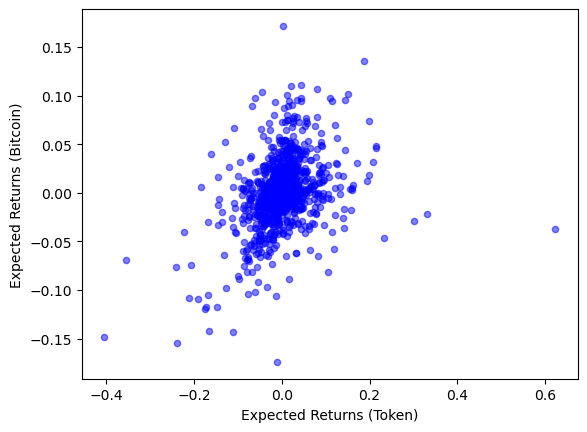

In [338]:
# Now the beta coefficients of the linear regressions between the expected returns of single token and market index is to be performed.
# Since there are three market indexes chosen, three regressions are to be done in this section.

# Here is the first graphical representation (scatter plot) of the FC Barcelona token expected Returns and the expected Returns of Bitcoin
merged_df_main.loc[merged_df_main["Club_Name"] == "FC Barcelona"].plot(kind = "scatter", 
                                                                       x = "Expected Returns (Token)", 
                                                                       y = "Expected Returns (Bitcoin)", 
                                                                       color = "blue", 
                                                                       alpha = .5)
plt.show()

## 10.1. Expected Returns (Token) vs Expected Returns (Bitcoin)

For this section, for the sake of practice, I performed the linear regressions using scipy and statsmodel libraries.

In [339]:
# Linear Regression with scipy.stats
X_bitcoin = merged_df_main["Expected Returns (Bitcoin)"].dropna()           # independent variable
Y_bitcoin = merged_df_main["Expected Returns (Token)"].dropna()             # dependent variable

slope_bitcoin, intercept_bitcoin, r_value_bitcoin, p_value_bitcoin, std_err_bitcoin = linregress(X_bitcoin, Y_bitcoin)

print(f"Slope: {round(slope_bitcoin, 4)}")
print(f"Intercept: {round(intercept_bitcoin, 4)}")
print(f"The correlation coefficient (r-value): {round(r_value_bitcoin, 4)}")
print(f"Statistical significance of linear relationship (p_value): {p_value_bitcoin}")
print(f"Standard error of the estimate (or of the regression): {round(std_err_bitcoin, 4)}")

Slope: 0.6975
Intercept: -0.0012
The correlation coefficient (r-value): 0.3574
Statistical significance of linear relationship (p_value): 0.0
Standard error of the estimate (or of the regression): 0.0157


In [340]:
# Linear regression with statsmodel
X_bitcoin_with_const = sm.add_constant(X_bitcoin)

model = sm.OLS(Y_bitcoin, X_bitcoin_with_const)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Expected Returns (Token)   R-squared:                       0.128
Model:                                  OLS   Adj. R-squared:                  0.128
Method:                       Least Squares   F-statistic:                     1975.
Date:                      Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                              23:46:30   Log-Likelihood:                 18243.
No. Observations:                     13491   AIC:                        -3.648e+04
Df Residuals:                         13489   BIC:                        -3.647e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0012      0.001     -2.167      0.030      -0.002      -0.000
Expected Returns (Bitcoin)     0.6975      0.016     44.447      0.000       0.667       0.728
==============================================================================
Omnibus:                     6403.860   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           870173.340
Skew:                           1.258   Prob(JB):                         0.00
Kurtosis:                      42.264   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 10.2. Expected Returns (Token) vs Expected Returns (Chiliz)

In [341]:
# Linear Regression with scipy.stats
X_chiliz = merged_df_main["Expected Returns (Chiliz)"].dropna()          # independent variable
Y_chiliz = merged_df_main["Expected Returns (Token)"].dropna()           # dependent variable

slope_chiliz, intercept_chiliz, r_value_chiliz, p_value_chiliz, std_err_chiliz = linregress(X_chiliz, Y_chiliz)

print(f"Slope: {round(slope_chiliz, 4)}")
print(f"Intercept: {round(intercept_chiliz, 4)}")
print(f"The correlation coefficient (r-value): {round(r_value_chiliz, 4)}")
print(f"Statistical significance of linear relationship (p_value): {p_value_chiliz}")
print(f"Standard error of the estimate (or of the regression): {round(std_err_chiliz, 4)}")

Slope: 0.4612
Intercept: -0.0014
The correlation coefficient (r-value): 0.4892
Statistical significance of linear relationship (p_value): 0.0
Standard error of the estimate (or of the regression): 0.0071


In [342]:
# Linear regression with statsmodel
X_chiliz_with_const = sm.add_constant(X_chiliz)

model = sm.OLS(Y_chiliz, X_chiliz_with_const)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Expected Returns (Token)   R-squared:                       0.239
Model:                                  OLS   Adj. R-squared:                  0.239
Method:                       Least Squares   F-statistic:                     4243.
Date:                      Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                              23:46:30   Log-Likelihood:                 19166.
No. Observations:                     13491   AIC:                        -3.833e+04
Df Residuals:                         13489   BIC:                        -3.831e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0014      0.001     -2.685      0.007      -0.002      -0.000
Expected Returns (Chiliz)     0.4612      0.007     65.138      0.000       0.447       0.475
==============================================================================
Omnibus:                     6639.339   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           868252.256
Skew:                           1.355   Prob(JB):                         0.00
Kurtosis:                      42.208   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 10.3. Expected Returns (Token) vs Expected Returns (CIX100)

In [343]:
# Linear Regression with scipy.stats
X_cix100 = merged_df_main["Expected Returns (CIX100)"].dropna()           # independent variable     
Y_cix100 = merged_df_main["Expected Returns (Token)"].dropna()            # dependent variable
  
slope_cix100, intercept_cix100, r_value_cix100, p_value_cix100, std_err_cix100 = linregress(X_cix100, Y_cix100)

print(f"Slope: {round(slope_cix100, 4)}")
print(f"Intercept: {round(intercept_cix100, 4)}")
print(f"The correlation coefficient (r-value): {round(r_value_cix100, 4)}")
print(f"Statistical significance of linear relationship (p_value): {p_value_cix100}")
print(f"Standard error of the estimate (or of the regression): {round(std_err_cix100, 4)}")

Slope: 0.1383
Intercept: -0.0004
The correlation coefficient (r-value): 0.2159
Statistical significance of linear relationship (p_value): 5.449410587013282e-142
Standard error of the estimate (or of the regression): 0.0054


In [344]:
# Linear regression with statsmodel
X_cix100_with_const = sm.add_constant(X_cix100)

model = sm.OLS(Y_cix100, X_cix100_with_const)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Expected Returns (Token)   R-squared:                       0.047
Model:                                  OLS   Adj. R-squared:                  0.047
Method:                       Least Squares   F-statistic:                     659.2
Date:                      Fri, 07 Jul 2023   Prob (F-statistic):          5.45e-142
Time:                              23:46:30   Log-Likelihood:                 17643.
No. Observations:                     13491   AIC:                        -3.528e+04
Df Residuals:                         13489   BIC:                        -3.527e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0004      0.001     -0.675      0.500      -0.001       0.001
Expected Returns (CIX100)     0.1383      0.005     25.676      0.000       0.128       0.149
==============================================================================
Omnibus:                     5127.479   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           553616.173
Skew:                           0.848   Prob(JB):                         0.00
Kurtosis:                      34.337   Cond. No.                         9.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 11. Calculate the Abnormal Returns for the Tokens

In [345]:
merged_df_main["Abnormal Returns (Token, Bitcoin)"] = merged_df_main["Expected Returns (Token)"] - (intercept_bitcoin - slope_bitcoin * merged_df_main["Expected Returns (Bitcoin)"])
merged_df_main["Abnormal Returns (Token, Chiliz)"] = merged_df_main["Expected Returns (Token)"] - (intercept_chiliz - slope_chiliz * merged_df_main["Expected Returns (Chiliz)"])
merged_df_main["Abnormal Returns (Token, CIX100)"] = merged_df_main["Expected Returns (Token)"] - (intercept_cix100 - slope_cix100 * merged_df_main["Expected Returns (CIX100)"])
merged_df_main

,Club_Name,Token_Name,Date,Close,Tournament,Club,Domestic,Champions_League,Europa_League,Home,Away,Win,Loss,Draw,Bitcoin_Close,Chiliz_Close,CIX100_Close,ln(Close),Expected Returns (Token),ln(Bitcoin_Close),ln(Chiliz_Close),ln(CIX100_Close),Expected Returns (Bitcoin),Expected Returns (Chiliz),Expected Returns (CIX100),"Abnormal Returns (Token, Bitcoin)","Abnormal Returns (Token, Chiliz)","Abnormal Returns (Token, CIX100)"
0,AC Milan,ACM8538-USD,2021-02-23,5.944448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48824.425781,0.042085,0.583602,1.782458,NaN,10.795986,-3.168064,-0.538536,NaN,NaN,NaN,NaN,NaN,NaN
1,AC Milan,ACM8538-USD,2021-02-24,18.385660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49705.332031,0.051536,0.563951,2.911571,1.129113,10.813867,-2.965475,-0.572788,0.017881,0.202589,-0.034252,1.142754,1.223897,1.124759
2,AC Milan,ACM8538-USD,2021-02-25,14.827024,Europa League,AC Milan,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,47093.851563,0.050438,0.884120,2.696451,-0.215120,10.759898,-2.987010,-0.123162,-0.053970,-0.021536,0.449625,-0.251596,-0.223701,-0.152578
3,AC Milan,ACM8538-USD,2021-02-26,12.321579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46339.761719,0.050639,0.766183,2.511352,-0.185099,10.743756,-2.983033,-0.266334,-0.016142,0.003977,-0.143172,-0.195191,-0.181914,-0.204512
4,AC Milan,ACM8538-USD,2021-02-27,12.433650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46188.453125,0.053514,0.809712,2.520407,0.009054,10.740485,-2.927812,-0.211077,-0.003271,0.055221,0.055258,0.007941,0.035873,0.017074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13504,Young Boys,YBO-USD,2023-05-01,0.478876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28091.568359,0.127700,0.010343,-0.736314,0.021991,10.243225,-2.058072,-4.571445,-0.041053,0.008564,0.044381,-0.005476,0.027292,0.028507
13505,Young Boys,YBO-USD,2023-05-02,0.501166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28680.537109,0.126877,0.010124,-0.690818,0.045496,10.263974,-2.064537,-4.592846,0.020749,-0.006466,-0.021401,0.061136,0.043865,0.042918
13506,Young Boys,YBO-USD,2023-05-03,0.499208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29006.308594,0.130002,0.010093,-0.694732,-0.003915,10.275269,-2.040205,-4.595913,0.011295,0.024332,-0.003067,0.005131,0.008658,-0.003958
13507,Young Boys,YBO-USD,2023-05-04,0.494228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28847.710938,0.129379,0.010166,-0.704758,-0.010026,10.269786,-2.045009,-4.588706,-0.005483,-0.004804,0.007207,-0.012682,-0.010890,-0.008649


In [346]:
# Adjust the data for missing values of control variables

# get rid of the columns, which are redundant: Club, Tournament
merged_df_main.drop(columns = ["Club", "Tournament"], inplace = True, errors = "ignore")
# for the columns "Domestic", "Europa_League", "Champions_League", "Home", "Away", "Win", "Loss", "Draw" fill the nan values with 0 => corresponding to the no game scenario
merged_df_main.update(merged_df_main[["Domestic", "Champions_League", "Europa_League", "Home", "Away", "Win", "Loss", "Draw"]].fillna(value = 0))

# 12. Second Linear Regression

## 12.1. Data Wrangling

In [347]:
merged_df_main_regression = merged_df_main.copy()
# remove the rows with NaN values (first row of each token price, since the expected returns calculates the difference to the day before)
merged_df_main_regression.dropna(axis = 0, inplace = True)

In [348]:
# remove all draw match results and delete columns Draw and Away (replaced by 0 for Home Column):
merged_df_main_regression = merged_df_main_regression.loc[merged_df_main_regression["Draw"] != 1]

In [349]:
# delete the Draw and Away columns
merged_df_main_regression.drop(columns = ["Draw", "Away"], inplace = True, errors = 'ignore')

# get rid of all rows when no matches took place
merged_df_main_regression = merged_df_main_regression.loc[~(merged_df_main_regression["Domestic"] == 0) | ~(merged_df_main_regression["Champions_League"] == 0) | ~(merged_df_main_regression["Europa_League"] == 0)]

# Calculation of AVG Abnormal Returns per Index (AVG Abnormal Return per Team and then for all Index)
AVG_Abnormal_Returns = merged_df_main_regression.groupby("Club_Name")[["Abnormal Returns (Token, Bitcoin)", "Abnormal Returns (Token, Chiliz)", "Abnormal Returns (Token, CIX100)"]].mean().mean()

# Add Columns of AVG Abnormal Returns
merged_df_main_regression["AVG Abnormal Returns (Token, Bitcoin)"] = AVG_Abnormal_Returns[0]
merged_df_main_regression["AVG Abnormal Returns (Token, Chiliz)"] = AVG_Abnormal_Returns[1]
merged_df_main_regression["AVG Abnormal Returns (Token, CIX100)"] = AVG_Abnormal_Returns[2]

# Combine different control variables and create columns with according logics behind
merged_df_main_regression["Win_Domestic"] = 0 
merged_df_main_regression.loc[(merged_df_main_regression["Win"] == 1) & (merged_df_main_regression["Domestic"] == 1), "Win_Domestic"] = 1

merged_df_main_regression["Loss_Domestic"] = 0 
merged_df_main_regression.loc[(merged_df_main_regression["Loss"] == 1) & (merged_df_main_regression["Domestic"] == 1), "Loss_Domestic"] = 1

merged_df_main_regression["Win_Champions"] = 0 
merged_df_main_regression.loc[(merged_df_main_regression["Win"] == 1) & (merged_df_main_regression["Champions_League"] == 1), "Win_Champions"] = 1

merged_df_main_regression["Loss_Champions"] = 0 
merged_df_main_regression.loc[(merged_df_main_regression["Loss"] == 1) & (merged_df_main_regression["Champions_League"] == 1), "Loss_Champions"] = 1

merged_df_main_regression["Win_Europa"] = 0 
merged_df_main_regression.loc[(merged_df_main_regression["Win"] == 1) & (merged_df_main_regression["Europa_League"] == 1), "Win_Europa"] = 1

merged_df_main_regression["Loss_Europa"] = 0 
merged_df_main_regression.loc[(merged_df_main_regression["Loss"] == 1) & (merged_df_main_regression["Europa_League"] == 1), "Loss_Europa"] = 1
merged_df_main_regression


,Club_Name,Token_Name,Date,Close,Domestic,Champions_League,Europa_League,Home,Win,Loss,Bitcoin_Close,Chiliz_Close,CIX100_Close,ln(Close),Expected Returns (Token),ln(Bitcoin_Close),ln(Chiliz_Close),ln(CIX100_Close),Expected Returns (Bitcoin),Expected Returns (Chiliz),Expected Returns (CIX100),"Abnormal Returns (Token, Bitcoin)","Abnormal Returns (Token, Chiliz)","Abnormal Returns (Token, CIX100)","AVG Abnormal Returns (Token, Bitcoin)","AVG Abnormal Returns (Token, Chiliz)","AVG Abnormal Returns (Token, CIX100)",Win_Domestic,Loss_Domestic,Win_Champions,Loss_Champions,Win_Europa,Loss_Europa
5,AC Milan,ACM8538-USD,2021-02-28,10.877663,1.0,0.0,0.0,0.0,1.0,0.0,45137.769531,0.050890,0.759262,2.386711,-0.133695,10.717475,-2.978089,-0.275408,-0.023010,-0.050277,-0.064332,-0.148577,-0.155531,-0.142208,-0.011699,-0.012182,-0.013083,1,0,0,0,0,0
12,AC Milan,ACM8538-USD,2021-03-07,10.835569,1.0,0.0,0.0,0.0,1.0,0.0,51206.691406,0.128621,0.656686,2.382834,0.010576,10.843625,-2.050885,-0.420549,0.045840,0.125367,-0.059160,0.043718,0.069746,0.002778,-0.011699,-0.012182,-0.013083,1,0,0,0,0,0
19,AC Milan,ACM8538-USD,2021-03-14,13.849198,1.0,0.0,0.0,1.0,0.0,1.0,59302.316406,0.658845,0.814227,2.628227,-0.075066,10.990404,-0.417267,-0.205516,-0.032203,0.107497,0.143021,-0.096360,-0.024138,-0.054913,-0.011699,-0.012182,-0.013083,0,1,0,0,0,0
23,AC Milan,ACM8538-USD,2021-03-18,13.073268,0.0,0.0,1.0,1.0,0.0,1.0,57858.921875,0.645016,0.845945,2.570570,0.012093,10.965763,-0.438480,-0.167301,-0.017339,0.097903,0.003757,0.001167,0.058597,0.012993,-0.011699,-0.012182,-0.013083,0,0,0,0,0,1
26,AC Milan,ACM8538-USD,2021-03-21,11.586903,1.0,0.0,0.0,0.0,1.0,0.0,57523.421875,0.554287,0.757154,2.449875,-0.052048,10.959947,-0.590073,-0.278189,-0.013644,0.010694,-0.020736,-0.060397,-0.045765,-0.054534,-0.011699,-0.012182,-0.013083,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13474,Young Boys,YBO-USD,2023-04-01,0.407877,1.0,0.0,0.0,0.0,0.0,1.0,28411.035156,0.121754,0.017614,-0.896790,-0.022741,10.254533,-2.105753,-4.039061,-0.002371,0.012446,-0.010280,-0.023228,-0.015650,-0.023782,-0.011699,-0.012182,-0.013083,0,1,0,0,0,0
13483,Young Boys,YBO-USD,2023-04-10,0.479375,1.0,0.0,0.0,1.0,1.0,0.0,29652.980469,0.133160,0.016359,-0.735272,0.029545,10.297318,-2.016204,-4.112977,0.045534,0.015561,-0.024038,0.062473,0.038073,0.026602,-0.011699,-0.012182,-0.013083,1,0,0,0,0,0
13495,Young Boys,YBO-USD,2023-04-22,0.437873,1.0,0.0,0.0,1.0,1.0,0.0,27817.500000,0.122311,0.014612,-0.825826,0.011422,10.233421,-2.101188,-4.225912,0.019625,0.022531,-0.093990,0.026278,0.023165,-0.001192,-0.011699,-0.012182,-0.013083,1,0,0,0,0,0
13498,Young Boys,YBO-USD,2023-04-25,0.457557,1.0,0.0,0.0,0.0,0.0,1.0,28307.597656,0.128527,0.014351,-0.781854,0.038375,10.250886,-2.051616,-4.243936,0.028023,0.041178,-0.051008,0.059089,0.058717,0.031703,-0.011699,-0.012182,-0.013083,0,1,0,0,0,0


## 12.2. Linear Regressions

For the next Linear Regressions, I used the stargazer library to perform them and nicely display them in tables.

In [350]:
# Control Variables to be investigated here: Win, Loss, Champions_League, Europa_League, Home

Y_bitcoin = merged_df_main_regression.iloc[:,-12]
Y_chiliz = merged_df_main_regression.iloc[:,-11]
Y_cix100 = merged_df_main_regression.iloc[:,-10]

# stargaze regressions + tabulation
reg1 = sm.OLS(endog=Y_bitcoin, exog=sm.add_constant(merged_df_main_regression.iloc[:, [8, 9]])).fit()
reg2 = sm.OLS(endog=Y_chiliz, exog=sm.add_constant(merged_df_main_regression.iloc[:, [8, 9]])).fit()
reg3 = sm.OLS(endog=Y_cix100, exog=sm.add_constant(merged_df_main_regression.iloc[:, [8, 9]])).fit()

reg4 = sm.OLS(endog=Y_bitcoin, exog=sm.add_constant(merged_df_main_regression.iloc[:, [5, 6, 7, 8, 9]])).fit()
reg5 = sm.OLS(endog=Y_chiliz, exog=sm.add_constant(merged_df_main_regression.iloc[:, [5, 6, 7, 8, 9]])).fit()
reg6 = sm.OLS(endog=Y_cix100, exog=sm.add_constant(merged_df_main_regression.iloc[:, [5, 6, 7, 8, 9]])).fit()

stargazer = Stargazer([reg1, reg2, reg3, reg4, reg5, reg6])
stargazer.title('Coefficients of Linear Regressions based on specific Control Variables and Market Indexes')
stargazer.custom_columns(['Bitcoin', 'Chiliz', 'CIX100', 'Bitcoin', 'Chiliz', 'CIX100'], [1, 1, 1, 1, 1, 1])
stargazer.covariate_order(['Win', 'Loss', 'Champions_League', 'Europa_League', 'Home'])
stargazer.significant_digits(4)
stargazer

In [351]:
# Control Variables to be investigated here: Win_Champions, Loss_Champions, Win_Europa, Loss_Europa, Win_Domestic, Loss_Domestic, Home

Y_bitcoin = merged_df_main_regression.iloc[:,-12]
Y_chiliz = merged_df_main_regression.iloc[:,-11]
Y_cix100 = merged_df_main_regression.iloc[:,-10]

# stargaze regressions + tabulation
reg1 = sm.OLS(endog=Y_bitcoin, exog=sm.add_constant(merged_df_main_regression.iloc[:, [7, -6, -5, -4, -3, -2, -1]])).fit()
reg2 = sm.OLS(endog=Y_chiliz, exog=sm.add_constant(merged_df_main_regression.iloc[:, [7, -6, -5, -4, -3, -2, -1]])).fit()
reg3 = sm.OLS(endog=Y_cix100, exog=sm.add_constant(merged_df_main_regression.iloc[:, [7, -6, -5, -4, -3, -2, -1]])).fit()

stargazer = Stargazer([reg1, reg2, reg3])
stargazer.title('Coefficients of Linear Regressions based on specific Control Variables and Market Indexes')
stargazer.custom_columns(['Bitcoin', 'Chiliz', 'CIX100'], [1, 1, 1])
stargazer.covariate_order(['Win_Champions', 'Loss_Champions', 'Win_Europa', 'Loss_Europa', 'Win_Domestic', 'Loss_Domestic', 'Home'])   
stargazer.significant_digits(4)
stargazer


Conclusion: When considering the abnormal returns (returns not generated due to market index development), the beta coefficients listed in the table above predict the effect of the token price change with respect to different control variables. A beta of 0.025 states that the token price will vary with 2.5% when the control variable (=binary variable) will be 1. 

For the current case, the following control variables were considered: Win, Loss, Champions_League, Europa_League, Home, Win_Champions, Loss_Champions, Win_Europa, Loss_Europa, Win_Domestic, Loss_Domestic. The table 1 of chapter 12.2. shows clearly which control variables are statistically significant as an influence factor for the token price. There are the Win and Loss. More interesting is the fact that the Loss has a higher beta, thus the negative outcome of a football match is a higher motivation for the token holders to potentially sell the token and therefore let the price fluctuate. This is a well known concept of behavioral finance which states that psychological effect of losing is higher than the reward gained by winning. 

The table 2 in this chapter extended the study by the championship played and combined the control variables according to the schema: win/loss + championship. The data shows that the most statistically significant binary variables with the highest betas are the wins and losses in Champions League, the most prestigious european football championship. Here the beta is again slightly higher in case of a loss (same behavior as in in the table 1). Interestingly, however, is the fact that the domestic matches are also an influence factor for the token price development. Although the scale is much smaller, the dataset contains teams from countries like Turkey, which rarely play in the european championships, but have an active domestic championship where the fans are strongly involved. For this reason, the domestic championships is also influencing the token price increases and/or decreases.


# 13. Analysis: Transfer Data Influence on Token Price

## 13.1. Establish Transfers DataFrame

Given the form of the transfer data, the target is to split the table into two parts, one being the transfer buy and the other transfer sell and wrangle the data. After that, the tables are to be concatenated back to a single DataFrame.

In [352]:
transfers = pd.read_csv("transfers_high_value_with_date.csv", 
                        delimiter = ";", 
                        parse_dates = True)
transfers.Date = transfers.Date.apply(lambda x: parse(x))
transfers = transfers.rename(columns = {"transfer_fee[EUR]" : "transfer_fee"})
transfers = transfers[["Date", "player_name", "team_left", "team_joined", "transfer_fee"]]

# split table and establish transfers_buy DataFrame
transfers_buy = transfers.copy()
transfers_buy = transfers_buy.drop(columns = "team_left")
transfers_buy = transfers_buy.rename(columns = {"team_joined" : "team"})
transfers_buy["Buy"] = 1 
transfers_buy["Sell"] = 0

# split table and establish transfers_sell DataFrame
transfers_sell = transfers.copy()
transfers_sell = transfers_sell.drop(columns = "team_joined")
transfers_sell = transfers_sell.rename(columns = {"team_left" : "team"})
transfers_sell["Buy"] = 0 
transfers_sell["Sell"] = 1

# concatenate the two tables
transfer_full = pd.concat([transfers_buy, transfers_sell], axis = 0)

# Adjust data and create two control variables Transfer_Summer and Transfer_Winter
transfer_full["Month"] = transfer_full["Date"].dt.month
transfer_full["Transfer_Summer"] = transfer_full["Month"].apply(lambda x: 1 if x in [7, 8, 9, 10] else 0)
transfer_full["Transfer_Winter"] = transfer_full["Transfer_Summer"].apply(lambda x: 0 if x == 1 else 1)
transfer_full = transfer_full.drop(columns = "Month")

transfer_full

,Date,player_name,team,transfer_fee,Buy,Sell,Transfer_Summer,Transfer_Winter
0,2018-07-01,Kylian Mbappe,Paris Saint-Germain,180000000,1,0,1,0
1,2018-07-10,Cristiano Ronaldo,Juventus,117000000,1,0,1,0
2,2018-07-01,Thomas Lemar,Atletico De Madrid,72000000,1,0,1,0
3,2018-07-10,Riyad Mahrez,Manchester City,67800000,1,0,1,0
4,2018-07-19,Alisson,Liverpool,62500000,1,0,1,0
...,...,...,...,...,...,...,...,...
104,2022-07-16,Kalidou Koulibaly,Napoli,38000000,0,1,1,0
105,2022-07-01,Fabio Vieira,FC Porto,35000000,0,1,1,0
106,2022-07-22,Oleksandr Zinchenko,Manchester City,35000000,0,1,1,0
107,2022-08-02,Charles De Ketelaere,Club Brugge,32000000,0,1,1,0


In [353]:
# Listing the teams which didnt't have transfers in the seasons between 2018 and 2023 or their value was too low (not in top 250)  
for i in teams_of_interest:
    a = transfer_full.loc[(transfer_full.team == i)]
    if a.shape[0] == 0:
        print(i)

Fenerbahce
Galatasaray
Inter Milan
Legia Warsaw
Rangers
Trabzonspor
Young Boys


In [354]:
# describe statistically the transfer fee column
transfer_full["transfer_fee"].describe().map('{:,.2f}'.format)

count            218.00
mean      46,144,862.39
std       25,091,257.90
min       25,000,000.00
25%       30,000,000.00
50%       38,000,000.00
75%       52,200,000.00
max      180,000,000.00
Name: transfer_fee, dtype: object

## 13.2. Merge the DataFrames

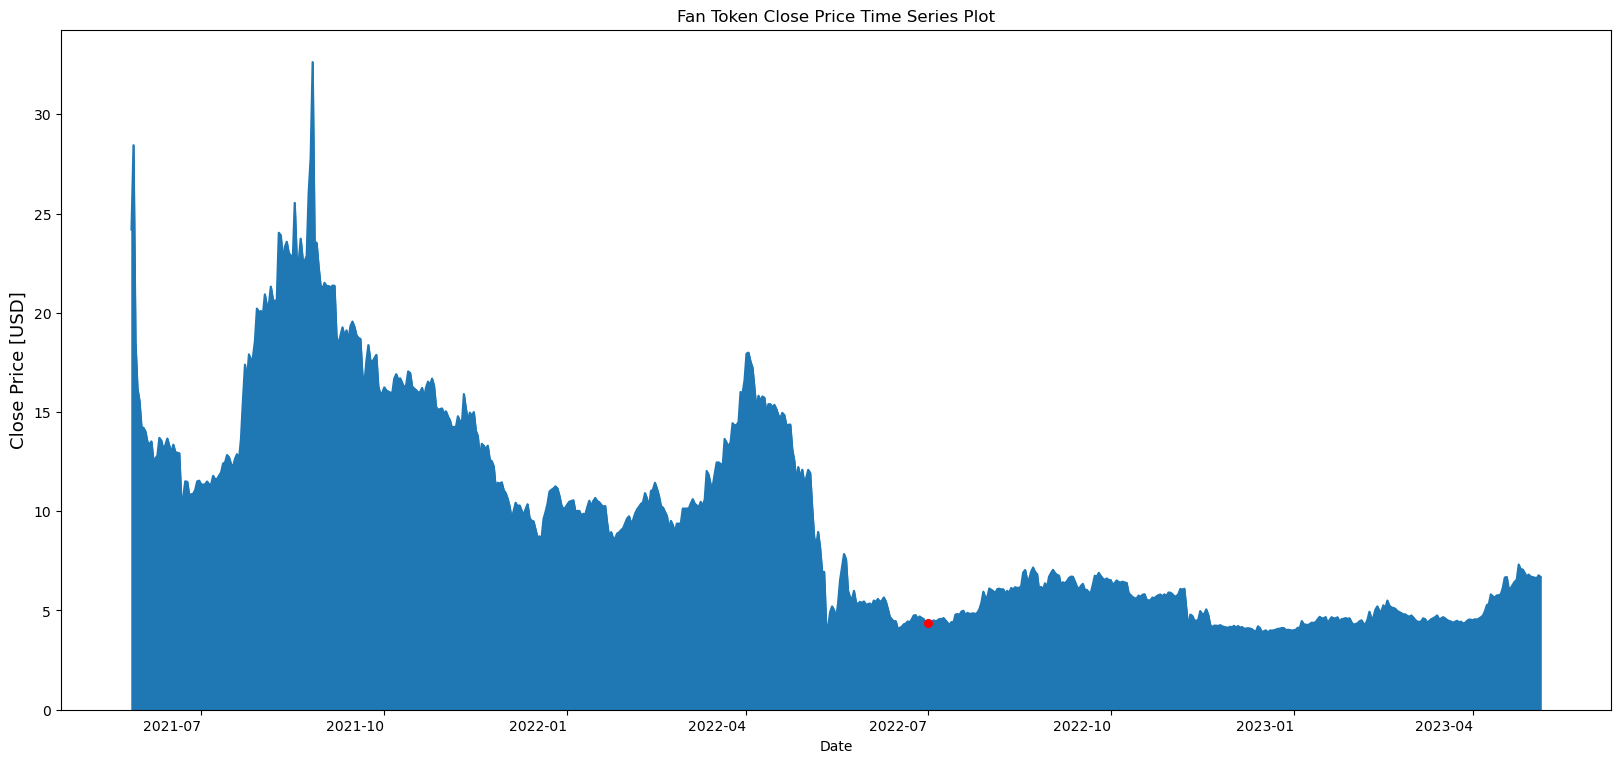

,index,Club_Name,Token_Name,Date,Close,Domestic,Champions_League,Europa_League,Home,Away,Win,Loss,Draw,Bitcoin_Close,Chiliz_Close,CIX100_Close,ln(Close),Expected Returns (Token),ln(Bitcoin_Close),ln(Chiliz_Close),ln(CIX100_Close),Expected Returns (Bitcoin),Expected Returns (Chiliz),Expected Returns (CIX100),"Abnormal Returns (Token, Bitcoin)","Abnormal Returns (Token, Chiliz)","Abnormal Returns (Token, CIX100)",player_name,team,transfer_fee,Buy,Sell,Transfer_Summer,Transfer_Winter
4897,4903,Manchester City,CITY10049-USD,2022-07-01,4.378325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19269.367188,0.094469,0.045518,1.476666,-0.00453,9.866272,-2.359484,-3.089647,-0.026394,-0.027253,-0.003027,-0.021771,-0.015747,-0.004568,Erling Haaland,Manchester City,60000000.0,1.0,0.0,1.0,0.0


In [355]:
# plot the Manchester City Token price history and illustrate graphically the acquisition of Erling Haaland. Does the price couse change drastically?

# merge data first
merged_df_transfer = merged_df_main.merge(transfer_full, left_on = ["Club_Name", "Date"], right_on = ["team", "Date"], how = "left")
merged_df_transfer.dropna(subset = "Expected Returns (Bitcoin)", inplace = True)
merged_df_transfer.reset_index(inplace = True)

# plot the data
ax = merged_df_transfer.loc[merged_df_transfer.Club_Name == "Manchester City"].plot(x = "Date", 
                                                                                    y = "Close", 
                                                                                    kind = "area", 
                                                                                    figsize = (20,10), 
                                                                                    zorder = 1, 
                                                                                    title = "Fan Token Close Price Time Series Plot", 
                                                                                    grid = True, 
                                                                                    legend = False)
merged_df_transfer.loc[(merged_df_transfer.Club_Name == "Manchester City") & (merged_df_transfer.player_name == "Erling Haaland")].plot(ax = ax, 
                                                                                                                                        x = "Date", 
                                                                                                                                        y = "Close", 
                                                                                                                                        kind = "scatter", 
                                                                                                                                        s = 30, 
                                                                                                                                        color = "red", 
                                                                                                                                        zorder = 2)
plt.ylabel("Close Price [USD]", fontsize = 13)
plt.show()

merged_df_transfer.loc[(merged_df_transfer.Club_Name == "Manchester City") & (merged_df_transfer.player_name == "Erling Haaland")]

In [356]:
# display the DataFrame for Manchester City period of buying Erling Haaland
merged_df_transfer.iloc[4897-1:, :].head(15)

,index,Club_Name,Token_Name,Date,Close,Domestic,Champions_League,Europa_League,Home,Away,Win,Loss,Draw,Bitcoin_Close,Chiliz_Close,CIX100_Close,ln(Close),Expected Returns (Token),ln(Bitcoin_Close),ln(Chiliz_Close),ln(CIX100_Close),Expected Returns (Bitcoin),Expected Returns (Chiliz),Expected Returns (CIX100),"Abnormal Returns (Token, Bitcoin)","Abnormal Returns (Token, Chiliz)","Abnormal Returns (Token, CIX100)",player_name,team,transfer_fee,Buy,Sell,Transfer_Summer,Transfer_Winter
4896,4902,Manchester City,CITY10049-USD,2022-06-30,4.398202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19784.726563,0.097079,0.045656,1.481196,-0.039006,9.892666,-2.332230,-3.086620,-0.016010,-0.028164,-0.032347,-0.049004,-0.050643,-0.043097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4897,4903,Manchester City,CITY10049-USD,2022-07-01,4.378325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19269.367188,0.094469,0.045518,1.476666,-0.004530,9.866272,-2.359484,-3.089647,-0.026394,-0.027253,-0.003027,-0.021771,-0.015747,-0.004568,Erling Haaland,Manchester City,60000000.0,1.0,0.0,1.0,0.0
4898,4904,Manchester City,CITY10049-USD,2022-07-02,4.446623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19242.255859,0.097078,0.045932,1.492145,0.015479,9.864864,-2.332240,-3.080593,-0.001408,0.027243,0.009054,0.015665,0.029394,0.017111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4899,4905,Manchester City,CITY10049-USD,2022-07-03,4.418222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19297.076172,0.098488,0.046517,1.485737,-0.006408,9.867709,-2.317821,-3.067937,0.002845,0.014420,0.012656,-0.003255,0.001594,-0.004277,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4900,4906,Manchester City,CITY10049-USD,2022-07-04,4.505518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20231.261719,0.101707,0.045779,1.505303,0.019566,9.914984,-2.285659,-3.083930,0.047275,0.032161,-0.015992,0.053708,0.035749,0.017735,Kalvin Phillips,Manchester City,49000000.0,1.0,0.0,1.0,0.0
4901,4907,Manchester City,CITY10049-USD,2022-07-04,4.505518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20231.261719,0.101707,0.045779,1.505303,0.019566,9.914984,-2.285659,-3.083930,0.047275,0.032161,-0.015992,0.053708,0.035749,0.017735,Gabriel Jesus,Manchester City,52200000.0,0.0,1.0,1.0,0.0
4902,4908,Manchester City,CITY10049-USD,2022-07-05,4.455033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20190.115234,0.098478,0.045698,1.494034,-0.011268,9.912948,-2.317922,-3.085701,-0.002036,-0.032263,-0.001771,-0.011521,-0.024797,-0.011133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4903,4909,Manchester City,CITY10049-USD,2022-07-06,4.499133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20548.246094,0.099733,0.044440,1.503885,0.009850,9.930531,-2.305259,-3.113615,0.017582,0.012663,-0.027915,0.023282,0.017042,0.006372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4904,4910,Manchester City,CITY10049-USD,2022-07-07,4.578285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21637.587891,0.103849,0.043836,1.521324,0.017440,9.982187,-2.264817,-3.127300,0.051656,0.040441,-0.013685,0.054638,0.037442,0.015928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4905,4911,Manchester City,CITY10049-USD,2022-07-08,4.558406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21731.117188,0.101130,0.044634,1.516973,-0.004351,9.986500,-2.291348,-3.109259,0.004313,-0.026531,0.018041,-0.000175,-0.015236,-0.001477,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Conclusion: Although you expect a huge variation in the token price after the acquisition of big football stars, the case of transfer of Erling Haaland to Manchester City proves the contrary. This makes the problem even more interesting and pushes us to dig deeper and find out if the control variables are statistically significant when considering the influence of the transfers on the token price development.

In [357]:
# merge the DataFrames
merged_df_transfer = merged_df_main.merge(transfer_full, 
                                          left_on = ["Club_Name", "Date"], 
                                          right_on = ["team", "Date"], 
                                          how = "left")
# Wrangle the data
merged_df_transfer.dropna(subset = "Expected Returns (Bitcoin)", inplace = True)
merged_df_transfer = merged_df_transfer[["Club_Name", "Token_Name", "Date", "Close", "Abnormal Returns (Token, Bitcoin)", "Abnormal Returns (Token, Chiliz)", "Abnormal Returns (Token, CIX100)", "player_name", "transfer_fee", "Buy", "Sell", "Transfer_Summer", "Transfer_Winter"]]
merged_df_transfer.update(merged_df_transfer[["Buy", "Sell", "Transfer_Summer", "Transfer_Winter"]].fillna(0))
merged_df_transfer["Month"] = merged_df_transfer["Date"].dt.month
merged_df_transfer["Year"] = merged_df_transfer["Date"].dt.year
merged_df_transfer = merged_df_transfer.loc[merged_df_transfer.Month.isin([1, 7, 8, 9, 10])]       # just consider the Token Price changes inside the transfer window periods
merged_df_transfer.reset_index(inplace = True)

# the months 9 and 10 are just considered as transfer window months for 2020 (exception for transfer window due to covid pandemic)
merged_df_transfer = merged_df_transfer.drop(merged_df_transfer.loc[(merged_df_transfer.Year != 2020) & (merged_df_transfer.Month.isin([9, 10]))].index)
# introduce the control variable Transfer
merged_df_transfer["Transfer"] = np.where(merged_df_transfer["transfer_fee"].isnull(), 0, 1)
merged_df_transfer.drop(columns = ["Month", "Year"], inplace = True)
# introduce the control variable Transfer_Buy
merged_df_transfer["Transfer_Buy"] = 0
merged_df_transfer.loc[(merged_df_transfer["Transfer"] == 1) & (merged_df_transfer["Buy"] == 1), "Transfer_Buy"] = 1
# introduce the control variable Transfer_Sell
merged_df_transfer["Transfer_Sell"] = 0
merged_df_transfer.loc[(merged_df_transfer["Transfer"] == 1) & (merged_df_transfer["Sell"] == 1), "Transfer_Sell"] = 1

merged_df_transfer

,index,Club_Name,Token_Name,Date,Close,"Abnormal Returns (Token, Bitcoin)","Abnormal Returns (Token, Chiliz)","Abnormal Returns (Token, CIX100)",player_name,transfer_fee,Buy,Sell,Transfer_Summer,Transfer_Winter,Transfer,Transfer_Buy,Transfer_Sell
0,128,AC Milan,ACM8538-USD,2021-07-01,6.079254,-0.027385,-0.020765,-0.005273,Fikayo Tomori,31600000.0,1.0,0.0,1.0,0.0,1,1,0
1,129,AC Milan,ACM8538-USD,2021-07-02,5.993581,-0.006307,-0.018478,-0.014972,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0
2,130,AC Milan,ACM8538-USD,2021-07-03,6.077946,0.030843,0.019691,0.016439,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0
3,131,AC Milan,ACM8538-USD,2021-07-04,6.101669,0.017412,0.010443,0.005835,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0
4,132,AC Milan,ACM8538-USD,2021-07-05,6.036303,-0.040764,-0.027357,-0.004458,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5452,13415,Young Boys,YBO-USD,2023-01-27,0.492903,-0.017489,-0.013908,-0.005574,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0
5453,13416,Young Boys,YBO-USD,2023-01-28,0.488008,-0.010254,-0.013232,-0.016576,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0
5454,13417,Young Boys,YBO-USD,2023-01-29,0.517225,0.081475,0.077333,0.050852,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0
5455,13418,Young Boys,YBO-USD,2023-01-30,0.469196,-0.124257,-0.134657,-0.081776,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0


## 13.3. Third Linear Regressions

In [358]:
# define the dependent variables Y for the three market indexes (Bitcoin, Chiliz and CIX100)
Y_bitcoin = merged_df_transfer.iloc[:, 4]
Y_chiliz = merged_df_transfer.iloc[:, 5]
Y_cix100 = merged_df_transfer.iloc[:, 6]

In [359]:
# Regrassion for Control Variable: Transfer

# stargaze regressions + tabulation
reg1 = sm.OLS(endog=Y_bitcoin, exog=sm.add_constant(merged_df_transfer.iloc[:, [-3]])).fit()
reg2 = sm.OLS(endog=Y_chiliz, exog=sm.add_constant(merged_df_transfer.iloc[:, [-3]])).fit()
reg3 = sm.OLS(endog=Y_cix100, exog=sm.add_constant(merged_df_transfer.iloc[:, [-3]])).fit()

stargazer = Stargazer([reg1, reg2, reg3])
stargazer.title('Coefficients of Linear Regressions based on specific Control Variables and Market Indexes')
stargazer.custom_columns(['Bitcoin', 'Chiliz', 'CIX100'], [1, 1, 1])
stargazer.covariate_order(['Transfer'])
stargazer.significant_digits(4)
stargazer

In [360]:
# Regrassion for Control Variables: Buy, Sell

# stargaze regressions + tabulation
reg1 = sm.OLS(endog=Y_bitcoin, exog=sm.add_constant(merged_df_transfer.iloc[:, [-7, -6]])).fit()
reg2 = sm.OLS(endog=Y_chiliz, exog=sm.add_constant(merged_df_transfer.iloc[:, [-7, -6]])).fit()
reg3 = sm.OLS(endog=Y_cix100, exog=sm.add_constant(merged_df_transfer.iloc[:, [-7, -6]])).fit()

stargazer = Stargazer([reg1, reg2, reg3])
stargazer.title('Coefficients of Linear Regressions based on specific Control Variables and Market Indexes')
stargazer.custom_columns(['Bitcoin', 'Chiliz', 'CIX100'], [1, 1, 1])
stargazer.covariate_order(['Buy', 'Sell'])
stargazer.significant_digits(4)
stargazer

In [361]:
# Regrassion for Control Variables: Transfer_Buy, Transfer_Sell

# stargaze regressions + tabulation
reg1 = sm.OLS(endog=Y_bitcoin, exog=sm.add_constant(merged_df_transfer.iloc[:, [-2, -1]])).fit()
reg2 = sm.OLS(endog=Y_chiliz, exog=sm.add_constant(merged_df_transfer.iloc[:, [-2, -1]])).fit()
reg3 = sm.OLS(endog=Y_cix100, exog=sm.add_constant(merged_df_transfer.iloc[:, [-2, -1]])).fit()

stargazer = Stargazer([reg1, reg2, reg3])
stargazer.title('Coefficients of Linear Regressions based on specific Control Variables and Market Indexes')
stargazer.custom_columns(['Bitcoin', 'Chiliz', 'CIX100'], [1, 1, 1])
stargazer.covariate_order(['Transfer_Buy', 'Transfer_Sell'])
stargazer.significant_digits(4)
stargazer

In [362]:
# Regrassion for Control Variables: Transfer_Summer, Transfer_Winter

# stargaze regressions + tabulation
reg1 = sm.OLS(endog=Y_bitcoin, exog=sm.add_constant(merged_df_transfer.iloc[:, [-5, -4]])).fit()
reg2 = sm.OLS(endog=Y_chiliz, exog=sm.add_constant(merged_df_transfer.iloc[:, [-5, -4]])).fit()
reg3 = sm.OLS(endog=Y_cix100, exog=sm.add_constant(merged_df_transfer.iloc[:, [-5, -4]])).fit()

stargazer = Stargazer([reg1, reg2, reg3])
stargazer.title('Coefficients of Linear Regressions based on specific Control Variables and Market Indexes')
stargazer.custom_columns(['Bitcoin', 'Chiliz', 'CIX100'], [1, 1, 1])
stargazer.covariate_order(['Transfer_Winter', 'Transfer_Summer'])
stargazer.significant_digits(4)
stargazer

In [363]:
# Regrassion for all the above Control Variables: Transfer, Buy, Sell, Transfer_Buy, Transfer_Sell, Transfer_Summer, Transfer_Winter

# stargaze regressions + tabulation
reg1 = sm.OLS(endog=Y_bitcoin, exog=sm.add_constant(merged_df_transfer.iloc[:, [-3]])).fit()
reg2 = sm.OLS(endog=Y_chiliz, exog=sm.add_constant(merged_df_transfer.iloc[:, [-3]])).fit()
reg3 = sm.OLS(endog=Y_cix100, exog=sm.add_constant(merged_df_transfer.iloc[:, [-3]])).fit()

reg4 = sm.OLS(endog=Y_bitcoin, exog=sm.add_constant(merged_df_transfer.iloc[:, [-7, -6]])).fit()
reg5 = sm.OLS(endog=Y_chiliz, exog=sm.add_constant(merged_df_transfer.iloc[:, [-7, -6]])).fit()
reg6 = sm.OLS(endog=Y_cix100, exog=sm.add_constant(merged_df_transfer.iloc[:, [-7, -6]])).fit()

reg7 = sm.OLS(endog=Y_bitcoin, exog=sm.add_constant(merged_df_transfer.iloc[:, [-5, -4, -2, -1]])).fit()
reg8 = sm.OLS(endog=Y_chiliz, exog=sm.add_constant(merged_df_transfer.iloc[:, [-5, -4, -2, -1]])).fit()
reg9 = sm.OLS(endog=Y_cix100, exog=sm.add_constant(merged_df_transfer.iloc[:, [-5, -4, -2, -1]])).fit()


stargazer = Stargazer([reg1, reg2, reg3, reg4, reg5, reg6, reg7, reg8, reg9])
stargazer.title('Coefficients of Linear Regressions based on specific Control Variables and Market Indexes')
stargazer.custom_columns(['Bitcoin', 'Chiliz', 'CIX100', 'Bitcoin', 'Chiliz', 'CIX100', 'Bitcoin', 'Chiliz', 'CIX100'], [1, 1, 1, 1, 1, 1, 1, 1, 1])
stargazer.covariate_order(['Transfer', 'Buy', 'Sell', 'Transfer_Buy', 'Transfer_Sell', 'Transfer_Summer', 'Transfer_Winter'])
stargazer.significant_digits(5)
stargazer

Conclusion: Although highly non-intuitive, the result table of the transfer study above shows that the transfers of players between teams have a minor influence on the token price.